<span style="color: red;">**Binary Classification with a Bank**</span>

**OVERVIEW**

The dataset used for this competition (both training and test sets) was derived from a deep learning model trained on the original Bank Marketing Dataset. I applied hyperparameter tuning on the Random Forest algorithm to identify the best-performing predictive model.
The goal is to predict whether a client will subscribe to a bank term deposit.The corresponding submission file was then uploaded to Kaggle.

**Data Source:** kaggle competitions download -c playground-series-s5e8

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading and inspecting the dataset
df = pd.read_csv('train.csv')
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7.0,no,no,cellular,25.0,aug,117.0,3.0,-1.0,0.0,unknown,0.0
1,1,38,blue-collar,married,secondary,no,514.0,no,no,unknown,18.0,jun,185.0,1.0,-1.0,0.0,unknown,0.0
2,2,36,blue-collar,married,secondary,no,602.0,yes,no,unknown,14.0,may,111.0,2.0,-1.0,0.0,unknown,0.0
3,3,27,student,single,secondary,no,34.0,yes,no,unknown,28.0,may,10.0,2.0,-1.0,0.0,unknown,0.0
4,4,26,technician,married,secondary,no,889.0,yes,no,cellular,3.0,feb,902.0,1.0,-1.0,0.0,unknown,1.0


In [ ]:
# Checking dataset dimensions
print("Column length", len(df.columns))
print("Row length", len(df))

Column length 18
Row length 72661


**Handling Missing Values and Encoding Categorical Variables**

In [ ]:
# Checking for missing values
df.isnull().sum()

,0
id,0
age,0
job,0
marital,1
education,1
default,1
balance,1
housing,1
loan,1
contact,1


In [ ]:
# Setting the 'id' column as the DataFrame index.
df = df.set_index('id')

In [ ]:
# Separating numerical and categorical variables

num = []
cat = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat.append(col)
    else:
        num.append(col)

print("Categorical Variables", cat)
print("Numerical Variables", num)

Categorical Variables ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical Variables ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']


In [ ]:
# Imputing with mode for categorical and median for numerical columns
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':

            df[col].fillna(df[col].mode()[0], inplace=True)
        else:

            df[col].fillna(df[col].median(), inplace=True)

For dealing with numerical variables above, since each had only one missing value, which is a very small proportion of the data. I chose to fill all missing numerical values using the median, regardless of whether the variable was normally distributed or skewed. The median is a robust measure of central tendency and is less affected by outliers, making it a reliable choice for imputing sparse missing values.

In [ ]:
# Converting categorical columns into numerical codes
for col in cat:
  df[col] = df[col].astype('category').cat.codes

In [ ]:
# Randomly selected records from DataFrame
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
60028,29,8,1,0,0,1670.0,0,0,0,28.0,5,522.0,3.0,-1.0,0.0,3,0.0
35073,50,2,1,1,0,2764.0,0,0,0,1.0,6,147.0,1.0,195.0,3.0,0,0.0
43813,47,0,2,1,0,708.0,1,0,0,17.0,0,57.0,1.0,317.0,1.0,0,0.0
25635,64,6,1,2,0,3843.0,0,0,1,14.0,0,104.0,3.0,-1.0,0.0,3,0.0
67521,35,2,2,1,0,1098.0,1,1,0,17.0,5,101.0,1.0,-1.0,0.0,3,0.0


**Note:** Feature scaling (e.g. standardization or normalization) is not applied in this case because Random Forest is a tree-based model. Tree-based algorithms are insensitive to the scale or distribution of feature values since they split data based on thresholds and not on distances. Therefore, applying scaling has no effect on the performance of the model.

**Preparing Features and Target, Model Training, and Prediction**

In [ ]:
# Splitting dataset into features (X) and target variable (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
# Importing required libraries
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

**Random Forest Classifier: Model Training and Evaluation**

In [ ]:
#  Importing RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Defining parameter grid
param_dist = {
    'n_estimators': [500, 1000],
    'max_depth': [None],
    'min_samples_split': [5, 7],
    'max_features': ['sqrt'],
    'criterion': ['entropy'],
    'n_jobs': [2],
    'max_samples': [0.5, 0.8],
    'min_samples_leaf': [1, 2]
}

# Initializing the model
rf = RandomForestClassifier(random_state=10)

# Seting up GridSearchCV
rf_cv = GridSearchCV(estimator=rf, param_grid=param_dist, cv=5, scoring='accuracy', verbose=1)

# Fit model
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['entropy'], 'max_depth': [None],
                         'max_features': ['sqrt'], 'max_samples': [0.5, 0.8],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [5, 7],
                         'n_estimators': [500, 1000, 3000], 'n_jobs': [2]},
             scoring='accuracy', verbose=1)

In [ ]:
# Model evaluation and best parameters
print("Best Parameters:", rf_cv.best_params_)
print("Best Accuracy:", rf_cv.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_samples': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000, 'n_jobs': 2}
Best Accuracy: 0.9268510217180994


In [ ]:
# Generating predictions on the test set
y_pred = rf_cv.predict(X_test)

In [ ]:
# Importing evaluation metrics for classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Evaluating model Accuracy on test data
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9287139613293883


The model correctly predicted approximately 92.87% of the data labels.

In [ ]:
# Confusion matrix for model predictions
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[12439   355]
 [  681  1058]]


The confusion matrix shows it correctly classified 12,439 true negatives and 1,058 true positives. However, it also misclassified 681 actual positives as negatives, suggesting the model struggles more with identifying the minority class.

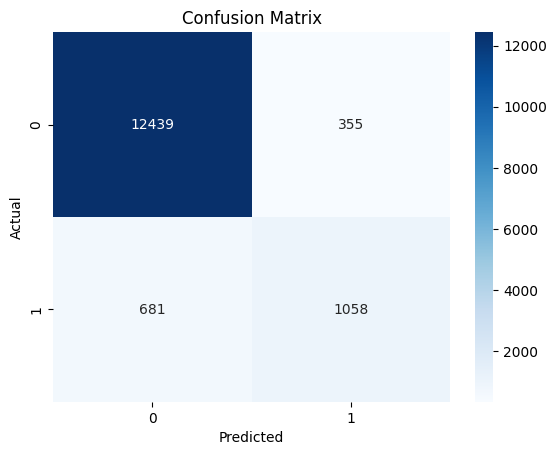

In [ ]:
# Visual representation of the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Detailed Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     12794
         1.0       0.75      0.61      0.67      1739

    accuracy                           0.93     14533
   macro avg       0.85      0.79      0.82     14533
weighted avg       0.92      0.93      0.93     14533



The classification report shows that the model performs very well on the majority class (0.0) with high precision and recall, but struggles with the minority class (1.0), achieving lower recall (61%) and precision (75%). The overall accuracy is 93%, but the lower macro average recall and F1-score indicate an imbalance in performance between the classes, suggesting the model may be biased toward predicting the majority class more accurately.

**LOADING AND PREPARING THE TEST DATA**

In [ ]:
test = pd.read_csv('test.csv')
test.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown


In [ ]:
# Checking for missing values
test.isnull().sum()

,0
id,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0


In [ ]:
# Identifying Categorical and Numerical variables in the test data
cat_1 = []
num_1 = []
for col in test.columns:
    if test[col].dtype == 'object':
        cat_1.append(col)
    else:
        num_1.append(col)

print("Categorical Variables", cat_1)
print("Numerical Variables", num_1)

Categorical Variables ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical Variables ['id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [ ]:
# Encoding categorical variables in the test data
for col in cat_1:
  test[col] = test[col].astype('category').cat.codes

In [ ]:
# Displaying a random sample of the test dataset
test.sample(3)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
199929,949929,47,1,2,0,0,2685,1,0,0,13,8,158,2,340,3,0
133524,883524,31,7,1,1,0,0,1,0,0,21,9,715,1,171,1,0
47463,797463,30,2,1,2,0,0,1,0,2,2,6,97,7,-1,0,3


In [ ]:
# Setting 'id' column as index in test data
test.set_index('id', inplace=True)

In [ ]:
# Generating the predictions for Test Dataset
y = rf_cv.predict(test)

In [ ]:
#Creating a submission dataset
submission = pd.DataFrame({
    'y': y
}, index=test.index)

submission.head(5)

,y
id,
750000,0.0
750001,0.0
750002,0.0
750003,0.0
750004,0.0


In [ ]:
# Save to CSV file with the index
submission.to_csv('submission.csv', index=True)

<span style="color: blue;">**Thank you for taking the time to view my code. Your feedback, suggestions, or corrections are most welcome.**</span>